# Author :- Biswajit Kumar singh

# Data Science And Business Analytics Internship

# The Spark Foundation

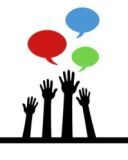

# GRIPDEC20

# Task :- 1

# Prediction using Supervised ML

* Predict the percentage of an student based on the no. of hours
* This is a simple linear regression task as it envolves just 2 variables
* What will be predicted score if a student studies for 9.25 hrs/day?
* Tools using :- Python
* DataSet link :-https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

In [1]:
#importing library
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing dataset
df=pd.read_csv("student_scores.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
# check for missing values
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
corr= df.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


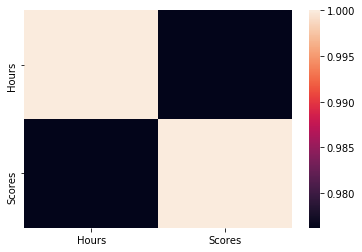

In [9]:
sns.heatmap(corr)

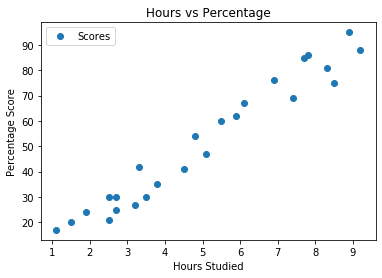

In [10]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [11]:
#extracting the values 
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [12]:
#slitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


In [14]:
#fitting the simple linear to the trainng set 
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print('lreg.coef_:',lreg.coef_)
print('lreg.intercept_:',lreg.intercept_)

lreg.coef_: [9.68207815]
lreg.intercept_: 2.826892353899737


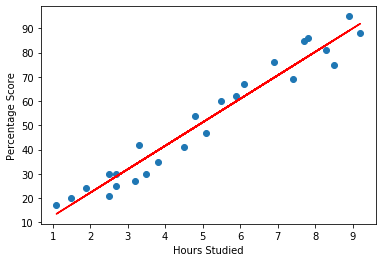

In [16]:
#Plotting the regression line
line= lreg.coef_*x+lreg.intercept_
plt.scatter(x,y,)
plt.plot(x,line, c='red');
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

In [17]:
#cheking accuracy of the model
print("Train Accuracy:",lreg.score(x_train, y_train))
print("Test Accuracy:",lreg.score(x_test, y_test))

Train Accuracy: 0.9491209376364417
Test Accuracy: 0.9678055545167994


In [27]:
# Predicting the scores
y_pred = lreg.predict(x_test)

In [28]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


## What will be predicted score if a student study for 9.25 hrs in a day?

In [29]:
hours= 9.25
own_pred= lreg.predict(np.array([9.25]).reshape(1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


In [31]:
# Finding error rate
from sklearn import metrics
print('mean absolute error: ',metrics.mean_absolute_error(y_test,y_pred))
print('mean squared error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error:  3.9207511902099244
mean squared error:  18.943211722315272
Root mean squared error 4.352380006653288
